In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph.
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches
%matplotlib inline
plt.style.use('seaborn-white')

# machine learning
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans
from sklearn import metrics #accuracy measure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../input/train.csv
../input/test.csv
../input/googleplaystore.csv
../input/googleplaystore_user_reviews.csv
../input/data.csv


![](https://images-na.ssl-images-amazon.com/images/I/31pQrwJSnwL.jpg) 
# EDA Google play store data
**Objective**

Notes on performing EDA

In this kernel,

*     Simple Exploratory Data Analysis
*     Data preprocessing

# EDA - Asking the right questions

The objective is to find answers to the following questions

**Descriptive questions**

1. What are the total number of applications in each categories?
2. What is the average rating of the applications in each categories?
3. What is the average price of applications in each categories?
4. What are the applications with, most number of reviews, highest rating, most revenue through installs, most number of installs?
5. How many percent of applications are free and how many are paid?
6. Which is the costliest application in the play store?
7. What is the distribution of applications in each category, Content Rating?
8. What is the average size of the applications?
9. What is the frequency of updates of applications?
10. How many applications are not updated after released?

**Exploratory**

1. What characteristics impact the rating of an application?
2. How cost plays an important part in the reviews ?

**Predictive**
1. How can we predict the success of an application based on number of reviews?



**Please provide your feedback for improvements.**

In [2]:
df = pd.read_csv('../input/googleplaystore.csv')
df_reviews = pd.read_csv('../input/googleplaystore_user_reviews.csv')

# Step 1 - Understanding the data

In [3]:
df_reviews.shape

(64295, 5)

In [4]:
df.shape

(10841, 13)

In [5]:
df_reviews.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [6]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [7]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Step 2 - Cleaning the data

In [9]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [11]:
#calculating the RATING based on mean value
df['Rating'].fillna((df['Rating'].mean()), inplace=True)

In [12]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [13]:
#droping the rest of na values
df1 = df.dropna()

In [14]:
df1.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
#final data shape
df1.shape

(10829, 13)

In [16]:
#check for the duplicated data based on the column APP name
df1[df1.duplicated(['App'])]

App       Category  Rating Reviews  \
229          Quick PDF Scanner + OCR FREE       BUSINESS     4.2   80805   
236                                   Box       BUSINESS     4.2  159872   
239                    Google My Business       BUSINESS     4.4   70991   
256                   ZOOM Cloud Meetings       BUSINESS     4.4   31614   
261             join.me - Simple Meetings       BUSINESS     4.0    6989   
...                                   ...            ...     ...     ...   
10715                  FarmersOnly Dating         DATING     3.0    1145   
10720  Firefox Focus: The privacy browser  COMMUNICATION     4.4   36981   
10730                         FP Notebook        MEDICAL     4.5     410   
10753      Slickdeals: Coupons & Shopping       SHOPPING     4.5   33599   
10768                                AAFP        MEDICAL     3.8      63   

                     Size     Installs  Type Price Content Rating  \
229    Varies with device   5,000,000+  Free     0       Everyone   
236    Varies with device  10,000,000+  Free     0       Everyone   
239    Varies with device   5,000,000+  Free     0       Everyone   
256                   37M  10,000,000+  Free     0       Everyone   
261    Varies with device   1,000,000+  Free     0       Everyone   
...                   ...          ...   ...   ...            ...   
10715                1.4M     100,000+  Free     0     Mature 17+   
10720                4.0M   1,000,000+  Free     0       Everyone   
10730                 60M      50,000+  Free     0       Everyone   
10753                 12M   1,000,000+  Free     0       Everyone   
10768                 24M      10,000+  Free     0       Everyone   

              Genres       Last Updated         Current Ver  \
229         Business  February 26, 2018  Varies with device   
236         Business      July 31, 2018  Varies with device   
239         Business      July 24, 2018    2.19.0.204537701   
256         Business      July 20, 2018      4.1.28165.0716   
261         Business      July 16, 2018           4.3.0.508   
...              ...                ...                 ...   
10715         Dating  February 25, 2016                 2.2   
10720  Communication       July 6, 2018                 5.2   
10730        Medical     March 24, 2018           2.1.0.372   
10753       Shopping      July 30, 2018                 3.9   
10768        Medical      June 22, 2018               2.3.1   

              Android Ver  
229          4.0.3 and up  
236    Varies with device  
239            4.4 and up  
256            4.0 and up  
261            4.4 and up  
...                   ...  
10715          4.0 and up  
10720          5.0 and up  
10730          4.4 and up  
10753          4.4 and up  
10768          5.0 and up  

[1181 rows x 13 columns]

In [17]:
df1[df1['App']=="Quick PDF Scanner + OCR FREE"]

App  Category  Rating Reviews  \
222  Quick PDF Scanner + OCR FREE  BUSINESS     4.2   80805   
229  Quick PDF Scanner + OCR FREE  BUSINESS     4.2   80805   
285  Quick PDF Scanner + OCR FREE  BUSINESS     4.2   80804   

                   Size    Installs  Type Price Content Rating    Genres  \
222  Varies with device  5,000,000+  Free     0       Everyone  Business   
229  Varies with device  5,000,000+  Free     0       Everyone  Business   
285  Varies with device  5,000,000+  Free     0       Everyone  Business   

          Last Updated         Current Ver   Android Ver  
222  February 26, 2018  Varies with device  4.0.3 and up  
229  February 26, 2018  Varies with device  4.0.3 and up  
285  February 26, 2018  Varies with device  4.0.3 and up

In [18]:
df1.shape

(10829, 13)

In [19]:
df1.sort_values(by=['Reviews'], inplace=True)

In [20]:
df1.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
2516                                         RT 516 VET   MEDICAL  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   

     Reviews   Size Installs  Type Price Content Rating    Genres  \
5086       0  10.0M   1,000+  Free     0       Everyone    Sports   
2516       0    29M      10+  Free     0       Everyone   Medical   
7728       0   4.1M     500+  Free     0       Everyone  Business   
5165       0    29M     100+  Free     0       Everyone   Medical   
5162       0    29M     100+  Free     0       Everyone   Medical   

           Last Updated  Current Ver   Android Ver  
5086  December 11, 2017          1.0    4.0 and up  
2516      July 13, 2018  300000.1.11  4.0.3 and up  
7728   January 12, 2018          3.8  4.0.3 and up  
5165      July 17, 2017  300000.0.86  4.0.3 and up  
5162   January 10, 2018  300000.0.96  4.0.3 and up

In [21]:
#Drop the duplicates based on the app names
df2 = df1.drop_duplicates(keep='last',subset=['App'])

In [22]:
df2.shape

(9648, 13)

In [23]:
df2.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

     Reviews   Size Installs  Type Price Content Rating    Genres  \
5086       0  10.0M   1,000+  Free     0       Everyone    Sports   
7728       0   4.1M     500+  Free     0       Everyone  Business   
5165       0    29M     100+  Free     0       Everyone   Medical   
5162       0    29M     100+  Free     0       Everyone   Medical   
5161       0    29M      50+  Free     0       Everyone   Medical   

           Last Updated  Current Ver   Android Ver  
5086  December 11, 2017          1.0    4.0 and up  
7728   January 12, 2018          3.8  4.0.3 and up  
5165      July 17, 2017  300000.0.86  4.0.3 and up  
5162   January 10, 2018  300000.0.96  4.0.3 and up  
5161       June 6, 2018  300000.1.08  4.0.3 and up

In [24]:
df2['Installs'].unique()

array(['1,000+', '500+', '100+', '50+', '1+', '5+', '10+', '10,000+',
       '0+', '50,000+', '100,000+', '5,000+', '1,000,000+', '5,000,000+',
       '10,000,000+', '100,000,000+', '50,000,000+', '500,000+',
       '1,000,000,000+', '500,000,000+'], dtype=object)

In [25]:
#Converting the Installs number into float value and copying in a different column
df2['Installs_num'] = df2['Installs'].apply(lambda x: float(x.split("+")[0].replace(",","")))

In [26]:
df2['Installs_num'].unique()

array([1.e+03, 5.e+02, 1.e+02, 5.e+01, 1.e+00, 5.e+00, 1.e+01, 1.e+04,
       0.e+00, 5.e+04, 1.e+05, 5.e+03, 1.e+06, 5.e+06, 1.e+07, 1.e+08,
       5.e+07, 5.e+05, 1.e+09, 5.e+08])

In [27]:
df2['Price'].unique()   

array(['0', '$2.99', '$3.99', '$1.49', '$0.99', '$1.99', '$13.99',
       '$25.99', '$2.00', '$2.49', '$39.99', '$19.99', '$5.99', '$4.99',
       '$28.99', '$399.99', '$394.99', '$200.00', '$30.99', '$3.61',
       '$8.99', '$109.99', '$1.04', '$154.99', '$1.96', '$14.99', '$6.49',
       '$5.49', '$4.85', '$3.49', '$29.99', '$3.04', '$12.99', '$3.88',
       '$74.99', '$15.99', '$7.99', '$9.99', '$9.00', '$4.60', '$6.99',
       '$16.99', '$8.49', '$1.61', '$37.99', '$4.49', '$4.84', '$2.59',
       '$1.20', '$3.28', '$1.00', '$11.99', '$10.99', '$3.95', '$24.99',
       '$14.00', '$10.00', '$2.50', '$3.90', '$1.76', '$46.99', '$33.99',
       '$389.99', '$4.59', '$400.00', '$17.99', '$4.77', '$4.80',
       '$19.90', '$2.60', '$1.26', '$7.49', '$1.97', '$2.95', '$15.46',
       '$2.56', '$379.99', '$299.99', '$18.99', '$3.08', '$1.75', '$5.00',
       '$19.40', '$2.90', '$1.70', '$89.99', '$3.02', '$1.59', '$1.29',
       '$1.50', '$4.29', '$79.99'], dtype=object)

In [28]:
#converting the price into float values
df2['Price_USD'] = df2['Price'].apply(lambda x: float(x.replace("$","")))

In [29]:
df2['Price_USD'].unique()

array([  0.  ,   2.99,   3.99,   1.49,   0.99,   1.99,  13.99,  25.99,
         2.  ,   2.49,  39.99,  19.99,   5.99,   4.99,  28.99, 399.99,
       394.99, 200.  ,  30.99,   3.61,   8.99, 109.99,   1.04, 154.99,
         1.96,  14.99,   6.49,   5.49,   4.85,   3.49,  29.99,   3.04,
        12.99,   3.88,  74.99,  15.99,   7.99,   9.99,   9.  ,   4.6 ,
         6.99,  16.99,   8.49,   1.61,  37.99,   4.49,   4.84,   2.59,
         1.2 ,   3.28,   1.  ,  11.99,  10.99,   3.95,  24.99,  14.  ,
        10.  ,   2.5 ,   3.9 ,   1.76,  46.99,  33.99, 389.99,   4.59,
       400.  ,  17.99,   4.77,   4.8 ,  19.9 ,   2.6 ,   1.26,   7.49,
         1.97,   2.95,  15.46,   2.56, 379.99, 299.99,  18.99,   3.08,
         1.75,   5.  ,  19.4 ,   2.9 ,   1.7 ,  89.99,   3.02,   1.59,
         1.29,   1.5 ,   4.29,  79.99])

In [30]:
df2['Reviews'].unique()   

array(['0', '1', '10', ..., '9975', '999', '9992'], dtype=object)

In [31]:
#Converting reviews count into int
df2['Reviews_count']= df1['Reviews'].apply(lambda x: int(x))

In [32]:
df2['Reviews_count'].unique()   

array([   0,    1,   10, ..., 9975,  999, 9992])

In [33]:
df2.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

     Reviews   Size Installs  Type Price Content Rating    Genres  \
5086       0  10.0M   1,000+  Free     0       Everyone    Sports   
7728       0   4.1M     500+  Free     0       Everyone  Business   
5165       0    29M     100+  Free     0       Everyone   Medical   
5162       0    29M     100+  Free     0       Everyone   Medical   
5161       0    29M      50+  Free     0       Everyone   Medical   

           Last Updated  Current Ver   Android Ver  Installs_num  Price_USD  \
5086  December 11, 2017          1.0    4.0 and up        1000.0        0.0   
7728   January 12, 2018          3.8  4.0.3 and up         500.0        0.0   
5165      July 17, 2017  300000.0.86  4.0.3 and up         100.0        0.0   
5162   January 10, 2018  300000.0.96  4.0.3 and up         100.0        0.0   
5161       June 6, 2018  300000.1.08  4.0.3 and up          50.0        0.0   

      Reviews_count  
5086              0  
7728              0  
5165              0  
5162              0  
5161              0

In [34]:
df2['Size'].unique()
    

array(['10.0M', '4.1M', '29M', '18M', '9.1M', '14M', 'Varies with device',
       '4.3M', '20M', '28M', '4.2M', '3.2M', '5.8M', '3.7M', '7.9M',
       '4.9M', '1.7M', '1.6M', '15M', '22M', '56M', '1.1M', '26M', '11M',
       '4.6M', '3.3M', '18k', '3.6M', '4.0M', '13M', '2.1M', '27M', '47M',
       '5.9M', '118k', '2.9M', '45M', '43M', '5.2M', '52M', '12M', '17M',
       '7.7M', '6.0M', '9.7M', '9.9M', '3.4M', '1.4M', '3.9M', '8.6M',
       '10M', '2.8M', '24M', '2.3M', '16M', '35M', '30M', '25M', '7.0M',
       '32M', '2.7M', '475k', '8.4M', '54M', '3.5M', '49M', '7.4M',
       '6.9M', '6.6M', '42M', '8.7M', '19M', '3.0M', '1.3M', '2.5M',
       '4.8M', '4.5M', '36M', '1.2M', '39M', '7.5M', '4.4M', '21M',
       '7.8M', '3.8M', '7.6M', '38M', '2.6M', '8.2M', '8.0M', '92M',
       '2.4M', '8.9M', '5.3M', '9.8M', '5.0M', '40M', '90M', '7.3M',
       '55M', '688k', '1.8M', '9.0M', '68M', '269k', '5.7M', '2.2M',
       '44M', '940k', '642k', '9.4M', '5.5M', '9.3M', '6.2M', '48M',
       '

In [35]:
len(df2[df2.Size == "Varies with device"])

1226

In [36]:
df2['Size'].replace('Varies with device',np.nan,inplace=True)

In [37]:
df2.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

     Reviews   Size Installs  Type Price Content Rating    Genres  \
5086       0  10.0M   1,000+  Free     0       Everyone    Sports   
7728       0   4.1M     500+  Free     0       Everyone  Business   
5165       0    29M     100+  Free     0       Everyone   Medical   
5162       0    29M     100+  Free     0       Everyone   Medical   
5161       0    29M      50+  Free     0       Everyone   Medical   

           Last Updated  Current Ver   Android Ver  Installs_num  Price_USD  \
5086  December 11, 2017          1.0    4.0 and up        1000.0        0.0   
7728   January 12, 2018          3.8  4.0.3 and up         500.0        0.0   
5165      July 17, 2017  300000.0.86  4.0.3 and up         100.0        0.0   
5162   January 10, 2018  300000.0.96  4.0.3 and up         100.0        0.0   
5161       June 6, 2018  300000.1.08  4.0.3 and up          50.0        0.0   

      Reviews_count  
5086              0  
7728              0  
5165              0  
5162              0  
5161              0

In [38]:
df2["Size"] = (df2["Size"].replace(r'[kM]+$', '', regex=True).astype(float) * df2["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(["k","M"], [10**3, 10**6]).astype(int))

In [39]:
df2.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

     Reviews        Size Installs  Type Price Content Rating    Genres  \
5086       0  10000000.0   1,000+  Free     0       Everyone    Sports   
7728       0   4100000.0     500+  Free     0       Everyone  Business   
5165       0  29000000.0     100+  Free     0       Everyone   Medical   
5162       0  29000000.0     100+  Free     0       Everyone   Medical   
5161       0  29000000.0      50+  Free     0       Everyone   Medical   

           Last Updated  Current Ver   Android Ver  Installs_num  Price_USD  \
5086  December 11, 2017          1.0    4.0 and up        1000.0        0.0   
7728   January 12, 2018          3.8  4.0.3 and up         500.0        0.0   
5165      July 17, 2017  300000.0.86  4.0.3 and up         100.0        0.0   
5162   January 10, 2018  300000.0.96  4.0.3 and up         100.0        0.0   
5161       June 6, 2018  300000.1.08  4.0.3 and up          50.0        0.0   

      Reviews_count  
5086              0  
7728              0  
5165              0  
5162              0  
5161              0

In [40]:
df2["Android Ver"].unique()

array(['4.0 and up', '4.0.3 and up', '4.3 and up', '4.1 and up',
       '4.2 and up', '2.3 and up', 'Varies with device', '5.0 and up',
       '4.4 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '5.1 and up', '2.2 and up', '2.3.3 and up', '3.0 and up',
       '3.2 and up', '4.4W and up', '1.5 and up', '3.1 and up',
       '5.0 - 7.1.1', '7.0 and up', '8.0 and up', '2.0.1 and up',
       '2.0 and up', '7.0 - 7.1.1', '4.0.3 - 7.1.1', '1.0 and up',
       '5.0 - 8.0', '7.1 and up', '5.0 - 6.0', '2.2 - 7.1.1',
       '4.1 - 7.1.1'], dtype=object)

In [41]:
len(df2[df2["Android Ver"] == "Varies with device"])

989

In [42]:
df2["Android Ver"].replace('Varies with device',np.nan,inplace=True)

In [43]:
df2["Android Ver"].unique()

array(['4.0 and up', '4.0.3 and up', '4.3 and up', '4.1 and up',
       '4.2 and up', '2.3 and up', nan, '5.0 and up', '4.4 and up',
       '6.0 and up', '1.6 and up', '2.1 and up', '5.1 and up',
       '2.2 and up', '2.3.3 and up', '3.0 and up', '3.2 and up',
       '4.4W and up', '1.5 and up', '3.1 and up', '5.0 - 7.1.1',
       '7.0 and up', '8.0 and up', '2.0.1 and up', '2.0 and up',
       '7.0 - 7.1.1', '4.0.3 - 7.1.1', '1.0 and up', '5.0 - 8.0',
       '7.1 and up', '5.0 - 6.0', '2.2 - 7.1.1', '4.1 - 7.1.1'],
      dtype=object)

In [44]:
#finding out the minimum android version supported for the apps
import re
df2['min_android_version'] = df2["Android Ver"].apply(lambda x: re.sub("[a-zA-Z]","", str(x)))

In [45]:
df2.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

     Reviews        Size Installs  Type Price Content Rating    Genres  \
5086       0  10000000.0   1,000+  Free     0       Everyone    Sports   
7728       0   4100000.0     500+  Free     0       Everyone  Business   
5165       0  29000000.0     100+  Free     0       Everyone   Medical   
5162       0  29000000.0     100+  Free     0       Everyone   Medical   
5161       0  29000000.0      50+  Free     0       Everyone   Medical   

           Last Updated  Current Ver   Android Ver  Installs_num  Price_USD  \
5086  December 11, 2017          1.0    4.0 and up        1000.0        0.0   
7728   January 12, 2018          3.8  4.0.3 and up         500.0        0.0   
5165      July 17, 2017  300000.0.86  4.0.3 and up         100.0        0.0   
5162   January 10, 2018  300000.0.96  4.0.3 and up         100.0        0.0   
5161       June 6, 2018  300000.1.08  4.0.3 and up          50.0        0.0   

      Reviews_count min_android_version  
5086              0               4.0    
7728              0             4.0.3    
5165              0             4.0.3    
5162              0             4.0.3    
5161              0             4.0.3

In [46]:
df2['Rating'].describe()

count    9648.000000
mean        4.176211
std         0.494433
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [47]:
df2.isna().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                   1226
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver             989
Installs_num              0
Price_USD                 0
Reviews_count             0
min_android_version       0
dtype: int64

In [48]:
df2['Size'].fillna((df2['Size'].mean()), inplace=True)

In [49]:
#Our final data frame with all the extra values removed
df3 = df2.drop(['Reviews','Installs','Price','Android Ver'],axis='columns')

In [50]:
df3.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

            Size  Type Content Rating    Genres       Last Updated  \
5086  10000000.0  Free       Everyone    Sports  December 11, 2017   
7728   4100000.0  Free       Everyone  Business   January 12, 2018   
5165  29000000.0  Free       Everyone   Medical      July 17, 2017   
5162  29000000.0  Free       Everyone   Medical   January 10, 2018   
5161  29000000.0  Free       Everyone   Medical       June 6, 2018   

      Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  
5086          1.0        1000.0        0.0              0               4.0    
7728          3.8         500.0        0.0              0             4.0.3    
5165  300000.0.86         100.0        0.0              0             4.0.3    
5162  300000.0.96         100.0        0.0              0             4.0.3    
5161  300000.1.08          50.0        0.0              0             4.0.3

# Step 3 - Data analysis

Text(0.5, 1.0, 'Distribution of Rating')

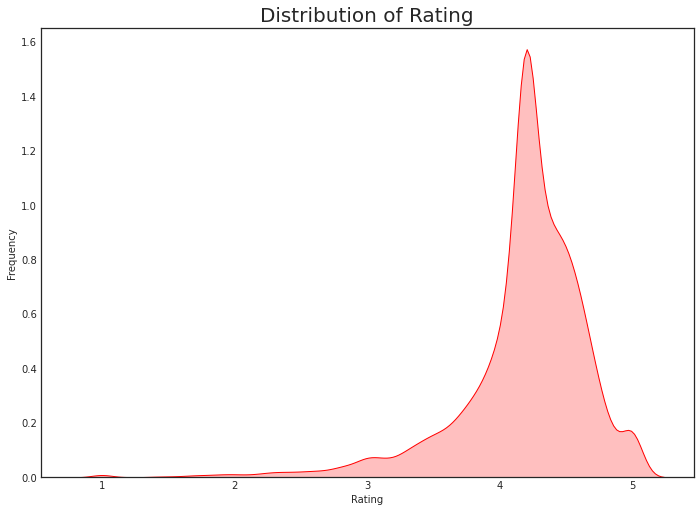

In [51]:
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df3.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

Text(0, 0.5, 'Count')

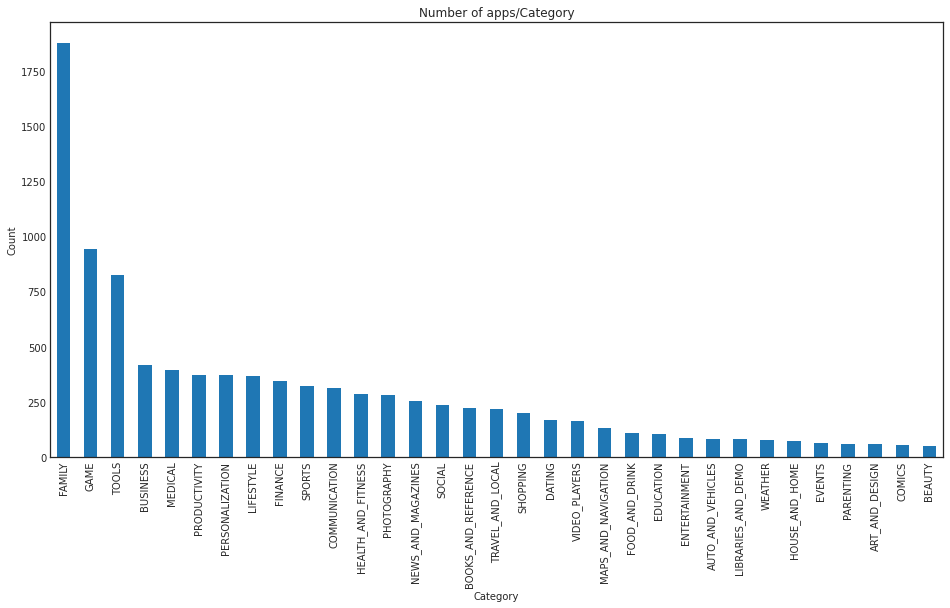

In [52]:
#Total Number of applications in each categories.

fig = plt.figure(figsize=(16,8)) 
df3.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Number of apps/Category', fontsize=10)
plt.ylabel('Count') 

#how to display %age on secondary axis on bar plot

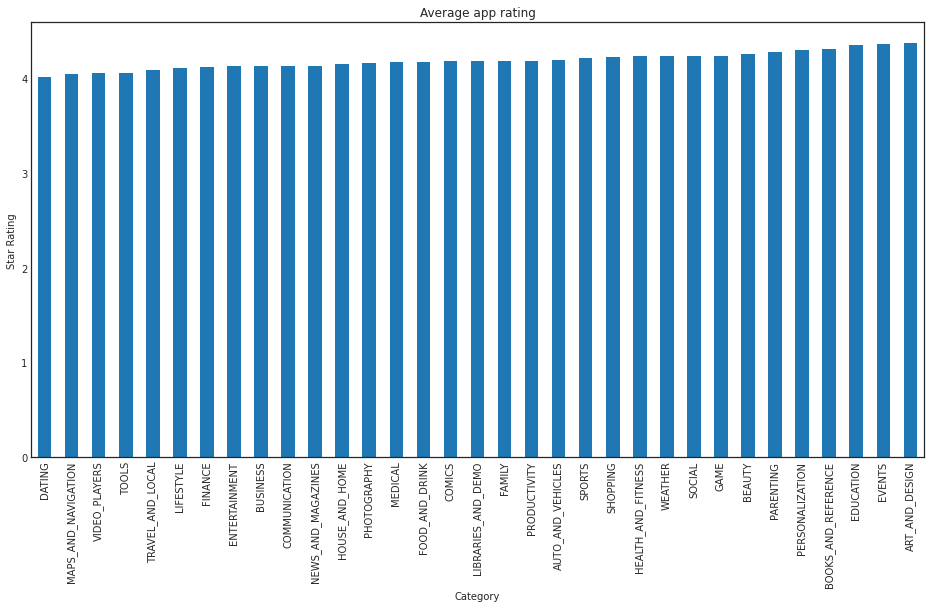

In [53]:
#What is the average rating of the applications in each categories?
fig = plt.figure(figsize=(16,8)) 
df3.groupby('Category').mean().sort_values(by='Rating',ascending='False')['Rating'].plot(kind='bar',title='Average app rating', fontsize=10)
plt.ylabel('Star Rating') 
plt.style.use('seaborn-white')

Text(0, 0.5, 'Average price - USD')

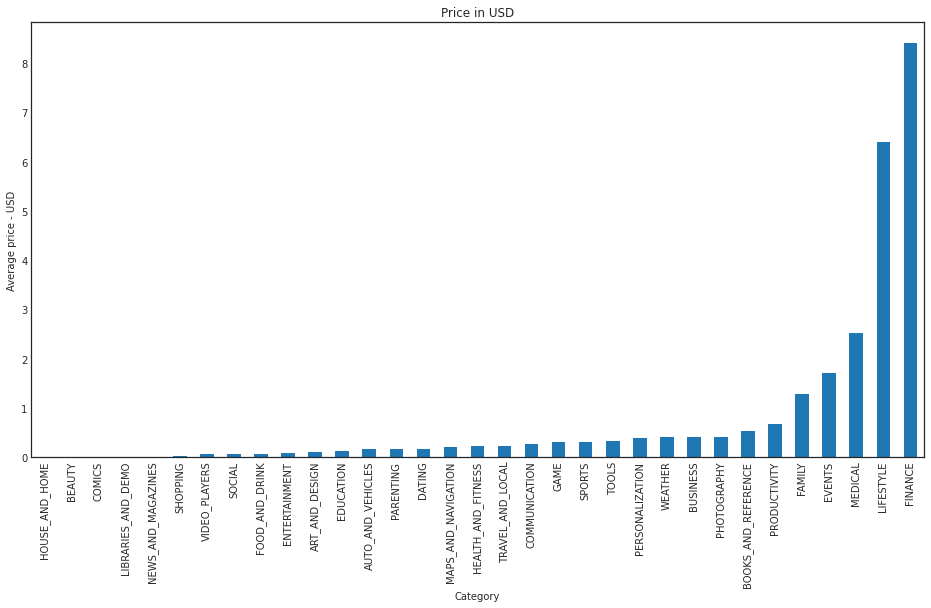

In [54]:
#What is the average price of applications in each categories?
fig = plt.figure(figsize=(16,8)) 
df3.groupby('Category').mean().sort_values(by='Price_USD',ascending='False')['Price_USD'].plot(kind='bar',title='Price in USD', fontsize=10)
plt.ylabel('Average price - USD') 

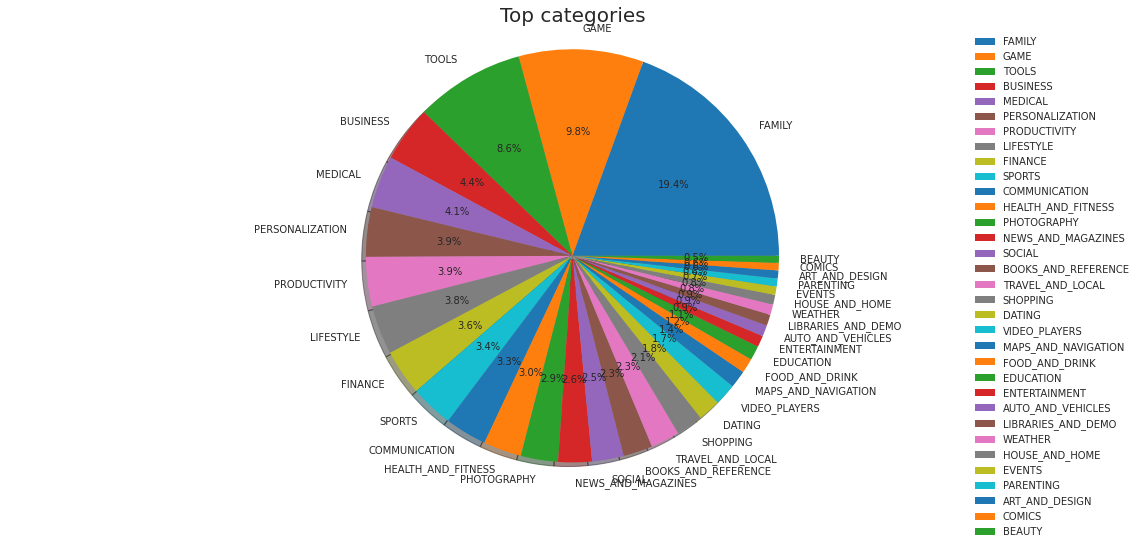

In [55]:
fig = plt.figure(figsize=(16,8)) 
labels = df3['Category'].value_counts(sort = True).index
sizes = df3['Category'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Top categories',size = 20)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [56]:
df3.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

            Size  Type Content Rating    Genres       Last Updated  \
5086  10000000.0  Free       Everyone    Sports  December 11, 2017   
7728   4100000.0  Free       Everyone  Business   January 12, 2018   
5165  29000000.0  Free       Everyone   Medical      July 17, 2017   
5162  29000000.0  Free       Everyone   Medical   January 10, 2018   
5161  29000000.0  Free       Everyone   Medical       June 6, 2018   

      Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  
5086          1.0        1000.0        0.0              0               4.0    
7728          3.8         500.0        0.0              0             4.0.3    
5165  300000.0.86         100.0        0.0              0             4.0.3    
5162  300000.0.96         100.0        0.0              0             4.0.3    
5161  300000.1.08          50.0        0.0              0             4.0.3

In [57]:
#What are the applications and categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?
#df3["Reviews_count"]==df3.Reviews_count.max()
print("Maximum number of reviews count is of : "+ df3[df3['Reviews_count']==df3.Reviews_count.max()]["App"].iloc[0] + " with a value of " + str(df3.Reviews_count.max()))
print("Maximum Rating is of : "+ df3[df3['Rating']==df3.Rating.max()]["App"].iloc[0] + " with a value of " + str(df3.Rating.max()))
print("Maximum number of installs is of : "+ df3[df3['Installs_num']==df3.Installs_num.max()]["App"].iloc[0] + " with a value of " + str(df3.Installs_num.max()))
print("Maximum price is of : "+ df3[df3['Price_USD']==df3.Price_USD.max()]["App"].iloc[0] + " with a value of " + str(df3.Price_USD.max()))


Maximum number of reviews count is of : Facebook with a value of 78158306
Maximum Rating is of : EC SPORTS with a value of 5.0
Maximum number of installs is of : Skype - free IM & video calls with a value of 1000000000.0
Maximum price is of : I'm Rich - Trump Edition with a value of 400.0


In [58]:
#What is the average size of the applications?
print("Mean size " + str(df3["Size"].mean()/(1024*1024)) + " Mb") #converting in MB
print("Heaviest app size " + str(df3["Size"].max()/(1024*1024)) + " Mb") #converting in MB
print("Smalles app size " + str(df3["Size"].min()/(1024*1024)) + " Mb") #converting in MB

Mean size 19.466126964426948 Mb
Heaviest app size 95.367431640625 Mb
Smalles app size 0.008106231689453125 Mb


Text(0, 0.5, 'Number of Install')

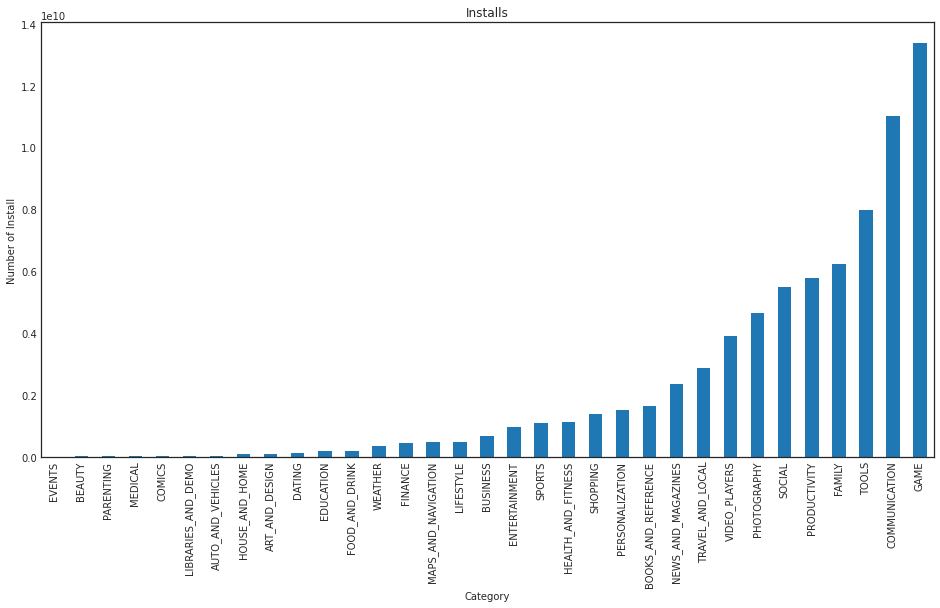

In [59]:
#What are the categories with, most number of reviews, highest rating, most revenue through installs, most number of installs?
fig = plt.figure(figsize=(16,8)) 
df3.groupby('Category').sum().sort_values(by='Installs_num',ascending='False')['Installs_num'].plot(kind='bar',title='Installs', fontsize=10)
plt.ylabel('Number of Install') 

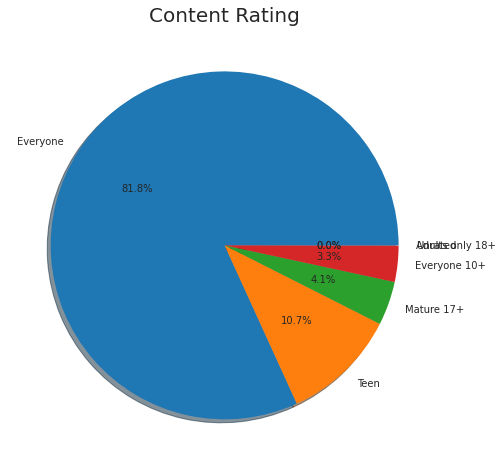

In [60]:

fig = plt.figure(figsize=(16,8)) 
labels = df3['Content Rating'].value_counts(sort = True).index
sizes = df3['Content Rating'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Content Rating',size = 20)
plt.show()

In [61]:
#added in version 16
df10= df3.copy()

In [62]:
#added in version 16
def is_free(price):
    if price > 0:
        return 1
    else:
        return 0

In [63]:
df3.isna().sum()

App                    0
Category               0
Rating                 0
Size                   0
Type                   0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Installs_num           0
Price_USD              0
Reviews_count          0
min_android_version    0
dtype: int64

In [64]:
df10["is_free"] = df10["Price_USD"].apply(lambda x: int(is_free(x))) 

In [65]:
df10.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

            Size  Type Content Rating    Genres       Last Updated  \
5086  10000000.0  Free       Everyone    Sports  December 11, 2017   
7728   4100000.0  Free       Everyone  Business   January 12, 2018   
5165  29000000.0  Free       Everyone   Medical      July 17, 2017   
5162  29000000.0  Free       Everyone   Medical   January 10, 2018   
5161  29000000.0  Free       Everyone   Medical       June 6, 2018   

      Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  \
5086          1.0        1000.0        0.0              0               4.0     
7728          3.8         500.0        0.0              0             4.0.3     
5165  300000.0.86         100.0        0.0              0             4.0.3     
5162  300000.0.96         100.0        0.0              0             4.0.3     
5161  300000.1.08          50.0        0.0              0             4.0.3     

      is_free  
5086        0  
7728        0  
5165        0  
5162        0  
5161        0

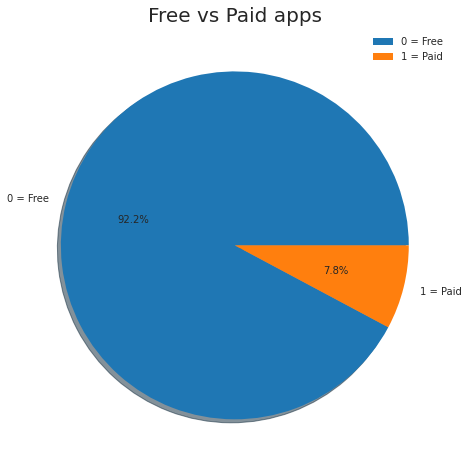

In [66]:
#How many percent of applications are free and how many are paid?
#to check how many apps are free
fig = plt.figure(figsize=(16,8)) 
labels = ['0 = Free','1 = Paid']
sizes = df10['is_free'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Free vs Paid apps',size = 20)
plt.legend()
plt.show()

No handles with labels found to put in legend.


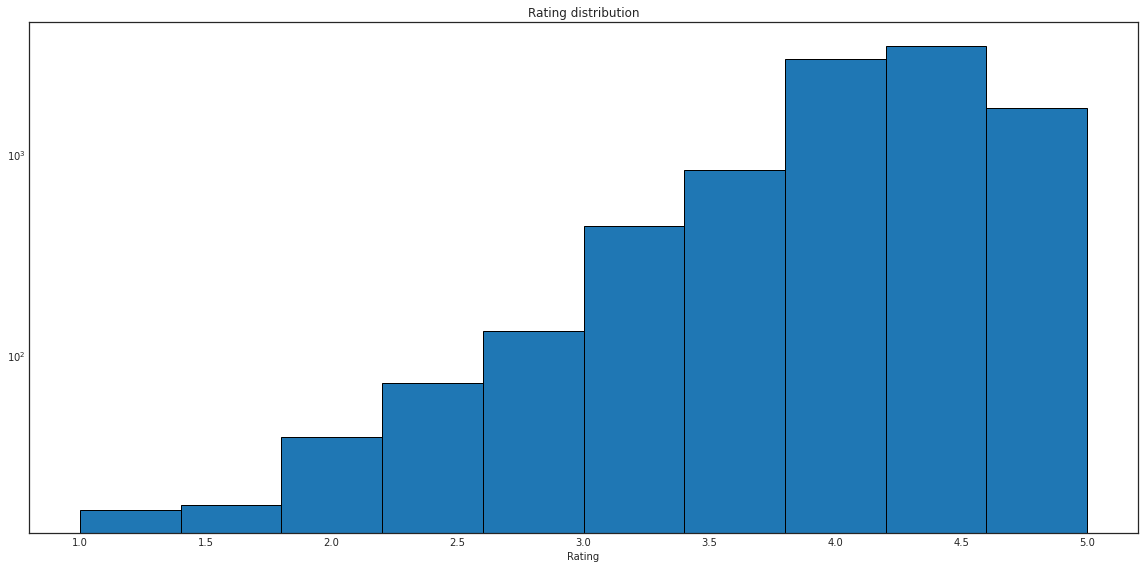

In [67]:
fig = plt.figure(figsize=(16,8)) 
plt.hist(df3['Rating'],edgecolor = 'black', log=True)
plt.title("Rating distribution")
plt.xlabel('Rating')
plt.tight_layout()
plt.legend()

No handles with labels found to put in legend.


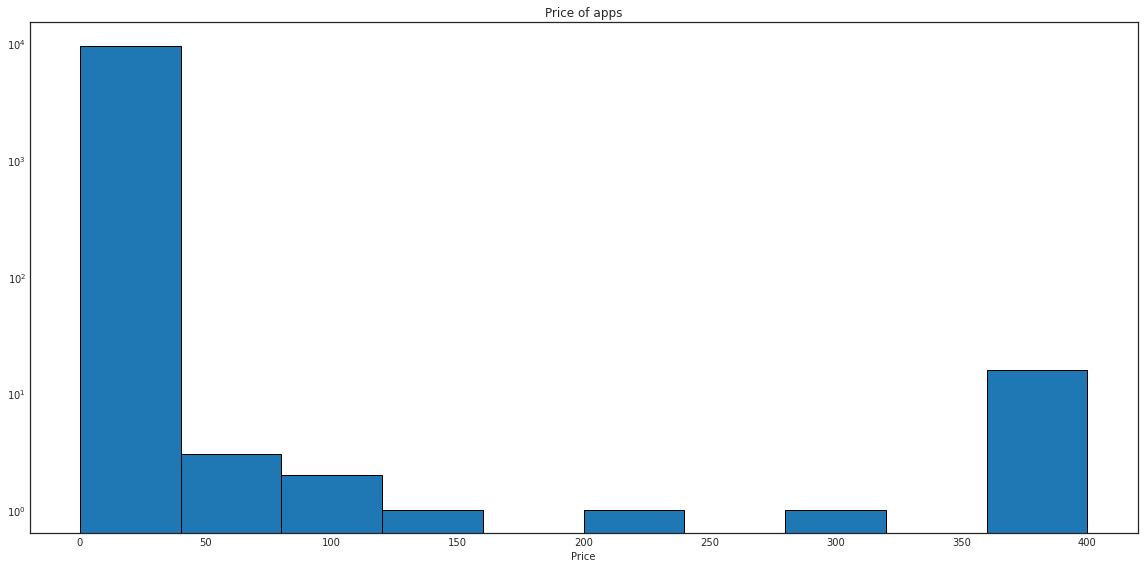

In [68]:

fig = plt.figure(figsize=(16,8)) 
plt.hist(df3['Price_USD'],edgecolor = 'black', log=True)
plt.title("Price of apps")
plt.xlabel('Price')
plt.tight_layout()
plt.legend()


In [69]:
df3.head()


App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

            Size  Type Content Rating    Genres       Last Updated  \
5086  10000000.0  Free       Everyone    Sports  December 11, 2017   
7728   4100000.0  Free       Everyone  Business   January 12, 2018   
5165  29000000.0  Free       Everyone   Medical      July 17, 2017   
5162  29000000.0  Free       Everyone   Medical   January 10, 2018   
5161  29000000.0  Free       Everyone   Medical       June 6, 2018   

      Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  
5086          1.0        1000.0        0.0              0               4.0    
7728          3.8         500.0        0.0              0             4.0.3    
5165  300000.0.86         100.0        0.0              0             4.0.3    
5162  300000.0.96         100.0        0.0              0             4.0.3    
5161  300000.1.08          50.0        0.0              0             4.0.3

Text(0, 0.5, 'Rating')

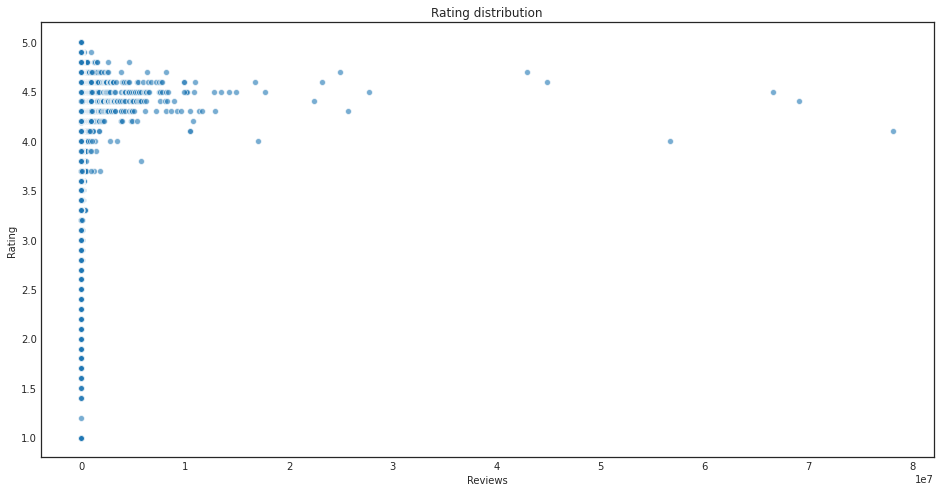

In [70]:
fig = plt.figure(figsize=(16,8)) 
plt.scatter(df3['Reviews_count'],df3['Rating'],edgecolor='white',linewidth=1,alpha=0.60)
plt.title('Rating distribution')
plt.xlabel('Reviews')
plt.ylabel('Rating')

In [71]:
df3[df3['Reviews_count']>70000000]

App Category  Rating          Size  Type Content Rating  Genres  \
2544  Facebook   SOCIAL     4.1  2.041171e+07  Free           Teen  Social   

        Last Updated         Current Ver  Installs_num  Price_USD  \
2544  August 3, 2018  Varies with device  1.000000e+09        0.0   

      Reviews_count min_android_version  
2544       78158306

In [72]:
df_paid_apps = df3[df3['Price_USD']>0]

In [73]:
#Feature engineering - Creating a column called revenue to find out the most revenue app based on the installs/sales
df_paid_apps["Revenue"] = df_paid_apps["Installs_num"] * df_paid_apps["Price_USD"]

In [74]:
df_paid_apps.head()

App          Category  \
5217                 Message AI - Write Better Messages             TOOLS   
9337                           EG | Explore Folegandros  TRAVEL_AND_LOCAL   
478                                   Truth or Dare Pro            DATING   
479     Private Dating, Hide App- Blue for PrivacyHider            DATING   
7745  25WPM Amateur ham radio Koch CW Morse code tra...             TOOLS   

        Rating        Size  Type Content Rating          Genres  \
5217  4.193338   7900000.0  Paid     Mature 17+           Tools   
9337  4.193338  56000000.0  Paid       Everyone  Travel & Local   
478   4.193338  20000000.0  Paid           Teen          Dating   
479   4.193338     18000.0  Paid       Everyone          Dating   
7745  4.193338   3700000.0  Paid       Everyone           Tools   

           Last Updated Current Ver  Installs_num  Price_USD  Reviews_count  \
5217       July 4, 2018       1.3.1         100.0       2.99              0   
9337   January 22, 2017       1.1.1           0.0       3.99              0   
478   September 1, 2017         1.0          50.0       1.49              0   
479       July 25, 2017       1.0.1         100.0       2.99              0   
7745       May 18, 2018       2.0.3          10.0       1.49              0   

     min_android_version  Revenue  
5217               5.0      299.0  
9337               4.1        0.0  
478                4.0       74.5  
479                4.0      299.0  
7745               2.1       14.9

In [75]:
df_paid_apps['Revenue'].describe()

count    7.530000e+02
mean     3.865836e+05
std      3.101616e+06
min      0.000000e+00
25%      2.990000e+02
50%      4.990000e+03
75%      4.990000e+04
max      6.990000e+07
Name: Revenue, dtype: float64

No handles with labels found to put in legend.


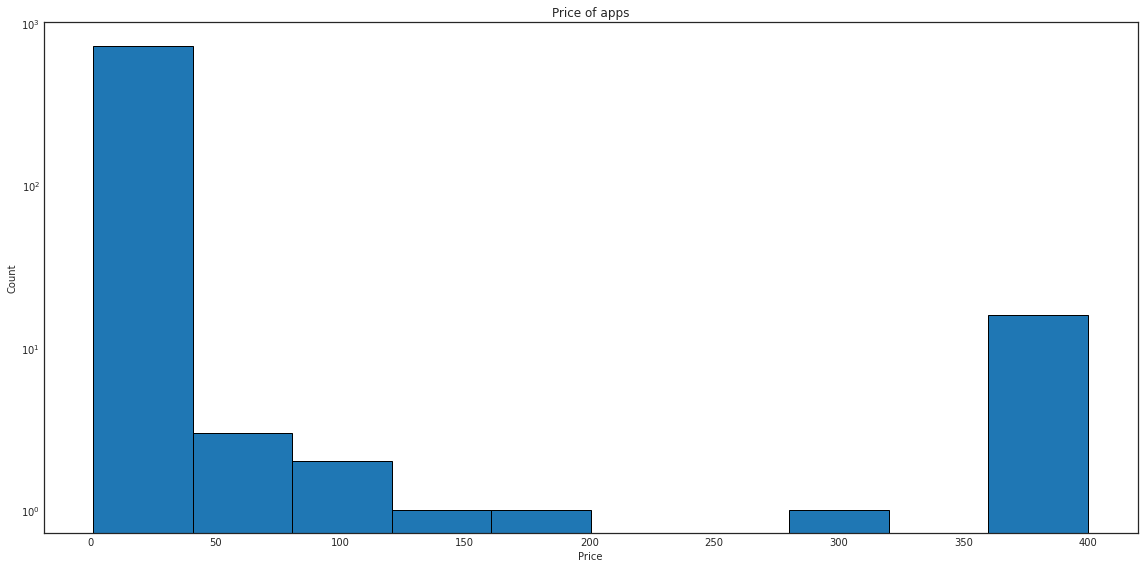

In [76]:
#plotting the histogram again after removing free apps
fig = plt.figure(figsize=(16,8)) 
plt.hist(df_paid_apps['Price_USD'],edgecolor = 'black', log=True)
median_age = df_paid_apps['Price_USD'].median()
plt.title("Price of apps")
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.legend()

Text(0, 0.5, 'Revenue from Sales/ Installs')

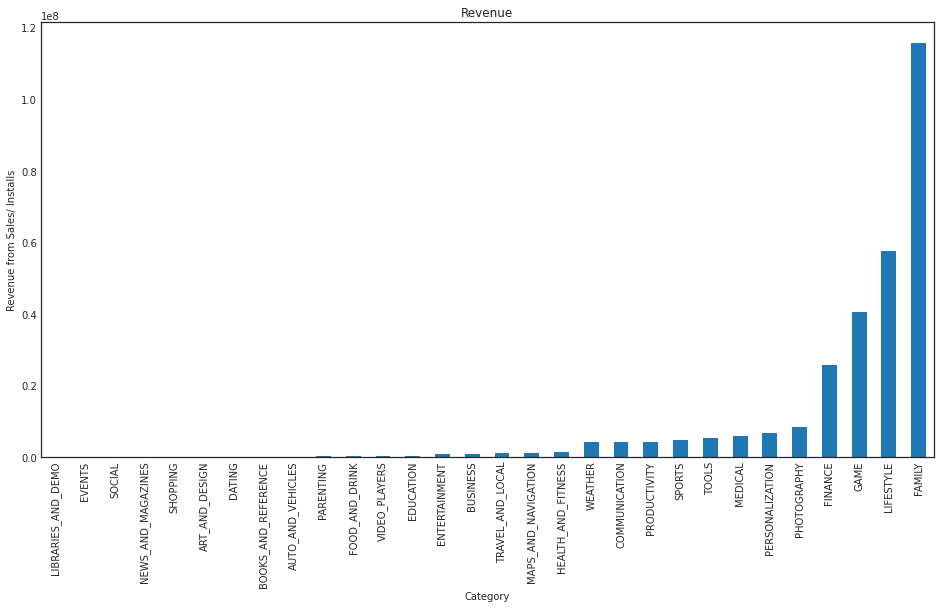

In [77]:
fig = plt.figure(figsize=(16,8)) 
df_paid_apps.groupby('Category').sum().sort_values(by='Revenue',ascending='False')['Revenue'].plot(kind='bar',title='Revenue', fontsize=10)
plt.ylabel('Revenue from Sales/ Installs')

In [78]:
df_paid_apps[df_paid_apps['Revenue']==69900000]

App Category  Rating          Size  Type Content Rating  \
2241  Minecraft   FAMILY     4.5  2.041171e+07  Paid   Everyone 10+   

                         Genres   Last Updated Current Ver  Installs_num  \
2241  Arcade;Action & Adventure  July 24, 2018     1.5.2.1    10000000.0   

      Price_USD  Reviews_count min_android_version     Revenue  
2241       6.99        2376564                      69900000.0

In [79]:
df3['last_updated_date'] = pd.to_datetime(df3['Last Updated'])

In [80]:
df3.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

            Size  Type Content Rating    Genres       Last Updated  \
5086  10000000.0  Free       Everyone    Sports  December 11, 2017   
7728   4100000.0  Free       Everyone  Business   January 12, 2018   
5165  29000000.0  Free       Everyone   Medical      July 17, 2017   
5162  29000000.0  Free       Everyone   Medical   January 10, 2018   
5161  29000000.0  Free       Everyone   Medical       June 6, 2018   

      Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  \
5086          1.0        1000.0        0.0              0               4.0     
7728          3.8         500.0        0.0              0             4.0.3     
5165  300000.0.86         100.0        0.0              0             4.0.3     
5162  300000.0.96         100.0        0.0              0             4.0.3     
5161  300000.1.08          50.0        0.0              0             4.0.3     

     last_updated_date  
5086        2017-12-11  
7728        2018-01-12  
5165        2017-07-17  
5162        2018-01-10  
5161        2018-06-06

<AxesSubplot:xlabel='last_updated_date'>

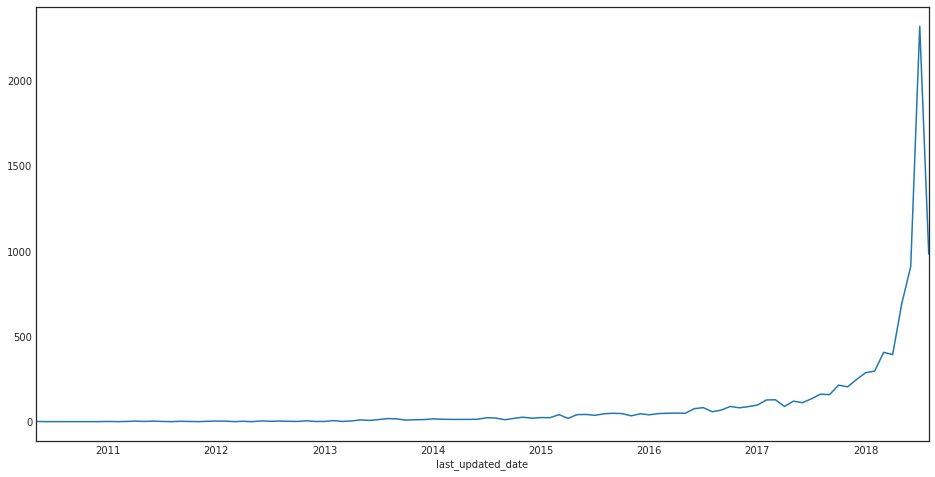

In [81]:
#group time series in weekly basis
df3.groupby(pd.Grouper(key='last_updated_date', freq='1M'))["Category"].count().plot(kind="line",animated=True,figsize=(16,8))


In [82]:
df3.head()

App  Category    Rating  \
5086  Apps for SportsBєtting.ag - Bitcoin Welcome here!    SPORTS  4.193338   
7728                           HR Team CQ Region Ed Qld  BUSINESS  4.193338   
5165                                        Ferguson AH   MEDICAL  4.193338   
5162                                         Hilltop AH   MEDICAL  4.193338   
5161                                    Bayview Hill AH   MEDICAL  4.193338   

            Size  Type Content Rating    Genres       Last Updated  \
5086  10000000.0  Free       Everyone    Sports  December 11, 2017   
7728   4100000.0  Free       Everyone  Business   January 12, 2018   
5165  29000000.0  Free       Everyone   Medical      July 17, 2017   
5162  29000000.0  Free       Everyone   Medical   January 10, 2018   
5161  29000000.0  Free       Everyone   Medical       June 6, 2018   

      Current Ver  Installs_num  Price_USD  Reviews_count min_android_version  \
5086          1.0        1000.0        0.0              0               4.0     
7728          3.8         500.0        0.0              0             4.0.3     
5165  300000.0.86         100.0        0.0              0             4.0.3     
5162  300000.0.96         100.0        0.0              0             4.0.3     
5161  300000.1.08          50.0        0.0              0             4.0.3     

     last_updated_date  
5086        2017-12-11  
7728        2018-01-12  
5165        2017-07-17  
5162        2018-01-10  
5161        2018-06-06

In [83]:
df3.select_dtypes('object').columns

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'min_android_version'],
      dtype='object')

# Prediction for App Rating

In [84]:
df4 = df3.drop(["App","Last Updated","Current Ver","last_updated_date","Last Updated"],axis="columns")

In [85]:
df4.head()

Category    Rating        Size  Type Content Rating    Genres  \
5086    SPORTS  4.193338  10000000.0  Free       Everyone    Sports   
7728  BUSINESS  4.193338   4100000.0  Free       Everyone  Business   
5165   MEDICAL  4.193338  29000000.0  Free       Everyone   Medical   
5162   MEDICAL  4.193338  29000000.0  Free       Everyone   Medical   
5161   MEDICAL  4.193338  29000000.0  Free       Everyone   Medical   

      Installs_num  Price_USD  Reviews_count min_android_version  
5086        1000.0        0.0              0               4.0    
7728         500.0        0.0              0             4.0.3    
5165         100.0        0.0              0             4.0.3    
5162         100.0        0.0              0             4.0.3    
5161          50.0        0.0              0             4.0.3

In [86]:
df4.dtypes

Category                object
Rating                 float64
Size                   float64
Type                    object
Content Rating          object
Genres                  object
Installs_num           float64
Price_USD              float64
Reviews_count            int64
min_android_version     object
dtype: object

In [87]:
df4["Size"] = df4["Size"].astype('int')
df4["Installs_num"] = df4["Installs_num"].astype('int')
df4["Price_USD"] = df4["Price_USD"].astype('int')
df4["Rating"] = df4["Rating"].astype('int')

In [88]:
df4.head()

Category  Rating      Size  Type Content Rating    Genres  Installs_num  \
5086    SPORTS       4  10000000  Free       Everyone    Sports          1000   
7728  BUSINESS       4   4099999  Free       Everyone  Business           500   
5165   MEDICAL       4  29000000  Free       Everyone   Medical           100   
5162   MEDICAL       4  29000000  Free       Everyone   Medical           100   
5161   MEDICAL       4  29000000  Free       Everyone   Medical            50   

      Price_USD  Reviews_count min_android_version  
5086          0              0               4.0    
7728          0              0             4.0.3    
5165          0              0             4.0.3    
5162          0              0             4.0.3    
5161          0              0             4.0.3

In [89]:
df4.Type = df4.Type.map({"Free":0,"Paid":1})
category_dummies = pd.get_dummies(df4.Category , prefix = "Category")
content_rating_dummies = pd.get_dummies(df4["Content Rating"] , prefix = "content_rating")
genres_dummies = pd.get_dummies(df4["Genres"] , prefix = "genres")


In [90]:
df5 = pd.concat([df4 , category_dummies,content_rating_dummies,
                             genres_dummies],axis = 1)

In [91]:
df5.isna().sum()

Category                                        0
Rating                                          0
Size                                            0
Type                                            0
Content Rating                                  0
                                               ..
genres_Video Players & Editors                  0
genres_Video Players & Editors;Creativity       0
genres_Video Players & Editors;Music & Video    0
genres_Weather                                  0
genres_Word                                     0
Length: 168, dtype: int64

In [92]:
df5.head()

Category  Rating      Size  Type Content Rating    Genres  Installs_num  \
5086    SPORTS       4  10000000     0       Everyone    Sports          1000   
7728  BUSINESS       4   4099999     0       Everyone  Business           500   
5165   MEDICAL       4  29000000     0       Everyone   Medical           100   
5162   MEDICAL       4  29000000     0       Everyone   Medical           100   
5161   MEDICAL       4  29000000     0       Everyone   Medical            50   

      Price_USD  Reviews_count min_android_version  ...  \
5086          0              0               4.0    ...   
7728          0              0             4.0.3    ...   
5165          0              0             4.0.3    ...   
5162          0              0             4.0.3    ...   
5161          0              0             4.0.3    ...   

      genres_Tools;Education  genres_Travel & Local  \
5086                       0                      0   
7728                       0                      0   
5165                       0                      0   
5162                       0                      0   
5161                       0                      0   

      genres_Travel & Local;Action & Adventure  genres_Trivia  \
5086                                         0              0   
7728                                         0              0   
5165                                         0              0   
5162                                         0              0   
5161                                         0              0   

      genres_Trivia;Education  genres_Video Players & Editors  \
5086                        0                               0   
7728                        0                               0   
5165                        0                               0   
5162                        0                               0   
5161                        0                               0   

      genres_Video Players & Editors;Creativity  \
5086                                          0   
7728                                          0   
5165                                          0   
5162                                          0   
5161                                          0   

      genres_Video Players & Editors;Music & Video  genres_Weather  \
5086                                             0               0   
7728                                             0               0   
5165                                             0               0   
5162                                             0               0   
5161                                             0               0   

      genres_Word  
5086            0  
7728            0  
5165            0  
5162            0  
5161            0  

[5 rows x 168 columns]

In [93]:
df6 = df5.drop(["Category","Content Rating","Genres","min_android_version"],axis="columns")

In [94]:
df6.select_dtypes('object').columns

Index([], dtype='object')

In [95]:
df6.shape

(9648, 164)

In [96]:
X = df6.drop('Rating', axis=1) 
y = df6.Rating

In [97]:
X.head()

Size  Type  Installs_num  Price_USD  Reviews_count  \
5086  10000000     0          1000          0              0   
7728   4099999     0           500          0              0   
5165  29000000     0           100          0              0   
5162  29000000     0           100          0              0   
5161  29000000     0            50          0              0   

      Category_ART_AND_DESIGN  Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
5086                        0                           0                0   
7728                        0                           0                0   
5165                        0                           0                0   
5162                        0                           0                0   
5161                        0                           0                0   

      Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  \
5086                             0                  0  ...   
7728                             0                  1  ...   
5165                             0                  0  ...   
5162                             0                  0  ...   
5161                             0                  0  ...   

      genres_Tools;Education  genres_Travel & Local  \
5086                       0                      0   
7728                       0                      0   
5165                       0                      0   
5162                       0                      0   
5161                       0                      0   

      genres_Travel & Local;Action & Adventure  genres_Trivia  \
5086                                         0              0   
7728                                         0              0   
5165                                         0              0   
5162                                         0              0   
5161                                         0              0   

      genres_Trivia;Education  genres_Video Players & Editors  \
5086                        0                               0   
7728                        0                               0   
5165                        0                               0   
5162                        0                               0   
5161                        0                               0   

      genres_Video Players & Editors;Creativity  \
5086                                          0   
7728                                          0   
5165                                          0   
5162                                          0   
5161                                          0   

      genres_Video Players & Editors;Music & Video  genres_Weather  \
5086                                             0               0   
7728                                             0               0   
5165                                             0               0   
5162                                             0               0   
5161                                             0               0   

      genres_Word  
5086            0  
7728            0  
5165            0  
5162            0  
5161            0  

[5 rows x 163 columns]

In [98]:
label = df6.Rating
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [99]:
df6.dtypes

Rating                                          int64
Size                                            int64
Type                                            int64
Installs_num                                    int64
Price_USD                                       int64
                                                ...  
genres_Video Players & Editors                  uint8
genres_Video Players & Editors;Creativity       uint8
genres_Video Players & Editors;Music & Video    uint8
genres_Weather                                  uint8
genres_Word                                     uint8
Length: 164, dtype: object

In [100]:
label = df6.Rating
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [101]:
lm_model = LogisticRegression()
lm_model.fit(X_train,y_train)

LogisticRegression()

In [102]:
test_predictions = lm_model.predict(X_test)

In [103]:
metrics.accuracy_score(test_predictions,y_test)

0.7742537313432836

In [104]:
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00       107
           3       0.33      0.00      0.00       810
           4       0.77      1.00      0.87      3736
           5       0.00      0.00      0.00       145

    accuracy                           0.77      4824
   macro avg       0.22      0.20      0.18      4824
weighted avg       0.66      0.77      0.68      4824



In [105]:
# def predict_rating()

# Observations

* **Finance apps** are the costliest one
* **Games** are the **most installed** category of the apps.
* Average rating is irrelevant to the category
* Around **19.7%** of the apps are related to family
* **81.8%** of the apps belong to everyone category


# Top Grossers

***What are the applications with, most number of reviews, highest rating, most revenue through installs, most number of installs?***

* Maximum number of reviews count is of : Facebook with a value of 78158306
* Maximum Rating is of : EC SPORTS with a value of 5.0
* Maximum number of installs is of : Skype - free IM & video calls with a value of 1000000000.0
* Maximum price is of : I'm Rich - Trump Edition with a value of 400.0


What is the average size of the applications?  19.4 Mb
